5487 Group Project
Group 24

Lee Chi Kin
Wong Yeung Sum

# Import and Pre-processing

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

x = pd.read_csv('https://raw.githubusercontent.com/sasukewong/CS5487-Project/main/digits4000_digits_vec.txt',sep='\t',header=None)
y = pd.read_csv('https://raw.githubusercontent.com/sasukewong/CS5487-Project/main/digits4000_digits_labels.txt',sep='\t',header=None)

labels_name = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

train_x_1 = x.iloc[:2000, :].to_numpy()
train_y_1 = np.transpose(y.iloc[:2000, :].to_numpy())[0]
test_x_1 = x.iloc[2000:, :].to_numpy()
test_y_1 = np.transpose(y.iloc[2000:, :].to_numpy())[0]

train_x_2 = x.iloc[2000:, :].to_numpy()
train_y_2 = np.transpose(y.iloc[2000:, :].to_numpy())[0]
test_x_2 = x.iloc[:2000, :].to_numpy()
test_y_2 = np.transpose(y.iloc[:2000, :].to_numpy())[0]

bonus_test_x = pd.read_csv('https://raw.githubusercontent.com/sasukewong/CS5487-Project/main/cdigits_digits_vec.txt',sep='\t',header=None).to_numpy()
bonus_test_y = np.transpose(pd.read_csv('https://raw.githubusercontent.com/sasukewong/CS5487-Project/main/cdigits_digits_labels.txt',sep='\t',header=None).to_numpy())[0]

In [ ]:
def confusion_matrix_heatmap(confusion_matrix, title):
  heatmap = sn.heatmap(confusion_matrix, annot=True, cmap="YlOrBr")

  heatmap.set_title(title);
  heatmap.set_xlabel('\nPredicted Values')
  heatmap.set_ylabel('Actual Values');

  heatmap.xaxis.set_ticklabels(labels_name)
  heatmap.yaxis.set_ticklabels(labels_name)

  plt.show()

# PCA

In [ ]:
pca_list = ['100%','90%','80%','70%','60%','50%','40%','30%','20%','10%']

trial_1_pca_90 = PCA(n_components=0.9).fit(train_x_1)
trial_1_pca_80 = PCA(n_components=0.8).fit(train_x_1)
trial_1_pca_70 = PCA(n_components=0.7).fit(train_x_1)
trial_1_pca_60 = PCA(n_components=0.6).fit(train_x_1)
trial_1_pca_50 = PCA(n_components=0.5).fit(train_x_1)
trial_1_pca_40 = PCA(n_components=0.4).fit(train_x_1)
trial_1_pca_30 = PCA(n_components=0.3).fit(train_x_1)
trial_1_pca_20 = PCA(n_components=0.2).fit(train_x_1)
trial_1_pca_10 = PCA(n_components=0.1).fit(train_x_1)

trial_2_pca_90 = PCA(n_components=0.9).fit(train_x_2)
trial_2_pca_80 = PCA(n_components=0.8).fit(train_x_2)
trial_2_pca_70 = PCA(n_components=0.7).fit(train_x_2)
trial_2_pca_60 = PCA(n_components=0.6).fit(train_x_2)
trial_2_pca_50 = PCA(n_components=0.5).fit(train_x_2)
trial_2_pca_40 = PCA(n_components=0.4).fit(train_x_2)
trial_2_pca_30 = PCA(n_components=0.3).fit(train_x_2)
trial_2_pca_20 = PCA(n_components=0.2).fit(train_x_2)
trial_2_pca_10 = PCA(n_components=0.1).fit(train_x_2)

train_x_1_pca = []
train_x_1_pca.append(trial_1_pca_90.transform(train_x_1))
train_x_1_pca.append(trial_1_pca_80.transform(train_x_1))
train_x_1_pca.append(trial_1_pca_70.transform(train_x_1))
train_x_1_pca.append(trial_1_pca_60.transform(train_x_1))
train_x_1_pca.append(trial_1_pca_50.transform(train_x_1))
train_x_1_pca.append(trial_1_pca_40.transform(train_x_1))
train_x_1_pca.append(trial_1_pca_30.transform(train_x_1))
train_x_1_pca.append(trial_1_pca_20.transform(train_x_1))
train_x_1_pca.append(trial_1_pca_10.transform(train_x_1))

test_x_1_pca = []
test_x_1_pca.append(trial_1_pca_90.transform(test_x_1))
test_x_1_pca.append(trial_1_pca_80.transform(test_x_1))
test_x_1_pca.append(trial_1_pca_70.transform(test_x_1))
test_x_1_pca.append(trial_1_pca_60.transform(test_x_1))
test_x_1_pca.append(trial_1_pca_50.transform(test_x_1))
test_x_1_pca.append(trial_1_pca_40.transform(test_x_1))
test_x_1_pca.append(trial_1_pca_30.transform(test_x_1))
test_x_1_pca.append(trial_1_pca_20.transform(test_x_1))
test_x_1_pca.append(trial_1_pca_10.transform(test_x_1))

bonus_x_1_pca = []
bonus_x_1_pca.append(trial_1_pca_90.transform(bonus_test_x))
bonus_x_1_pca.append(trial_1_pca_80.transform(bonus_test_x))
bonus_x_1_pca.append(trial_1_pca_70.transform(bonus_test_x))
bonus_x_1_pca.append(trial_1_pca_60.transform(bonus_test_x))
bonus_x_1_pca.append(trial_1_pca_50.transform(bonus_test_x))
bonus_x_1_pca.append(trial_1_pca_40.transform(bonus_test_x))
bonus_x_1_pca.append(trial_1_pca_30.transform(bonus_test_x))
bonus_x_1_pca.append(trial_1_pca_20.transform(bonus_test_x))
bonus_x_1_pca.append(trial_1_pca_10.transform(bonus_test_x))

train_x_2_pca = []
train_x_2_pca.append(trial_2_pca_90.transform(train_x_2))
train_x_2_pca.append(trial_2_pca_80.transform(train_x_2))
train_x_2_pca.append(trial_2_pca_70.transform(train_x_2))
train_x_2_pca.append(trial_2_pca_60.transform(train_x_2))
train_x_2_pca.append(trial_2_pca_50.transform(train_x_2))
train_x_2_pca.append(trial_2_pca_40.transform(train_x_2))
train_x_2_pca.append(trial_2_pca_30.transform(train_x_2))
train_x_2_pca.append(trial_2_pca_20.transform(train_x_2))
train_x_2_pca.append(trial_2_pca_10.transform(train_x_2))

test_x_2_pca = []
test_x_2_pca.append(trial_2_pca_90.transform(test_x_2))
test_x_2_pca.append(trial_2_pca_80.transform(test_x_2))
test_x_2_pca.append(trial_2_pca_70.transform(test_x_2))
test_x_2_pca.append(trial_2_pca_60.transform(test_x_2))
test_x_2_pca.append(trial_2_pca_50.transform(test_x_2))
test_x_2_pca.append(trial_2_pca_40.transform(test_x_2))
test_x_2_pca.append(trial_2_pca_30.transform(test_x_2))
test_x_2_pca.append(trial_2_pca_20.transform(test_x_2))
test_x_2_pca.append(trial_2_pca_10.transform(test_x_2))

bonus_x_2_pca = []
bonus_x_2_pca.append(trial_2_pca_90.transform(bonus_test_x))
bonus_x_2_pca.append(trial_2_pca_80.transform(bonus_test_x))
bonus_x_2_pca.append(trial_2_pca_70.transform(bonus_test_x))
bonus_x_2_pca.append(trial_2_pca_60.transform(bonus_test_x))
bonus_x_2_pca.append(trial_2_pca_50.transform(bonus_test_x))
bonus_x_2_pca.append(trial_2_pca_40.transform(bonus_test_x))
bonus_x_2_pca.append(trial_2_pca_30.transform(bonus_test_x))
bonus_x_2_pca.append(trial_2_pca_20.transform(bonus_test_x))
bonus_x_2_pca.append(trial_2_pca_10.transform(bonus_test_x))

# Bayes Classifiers

Bayes Classifiers Trial 1 & 2 Mean Accuracy:  0.5735
Bayes Classifiers Trial 1 & 2 PCA=90% Mean Accuracy:  0.8637499999999999
Bayes Classifiers Trial 1 & 2 PCA=80% Mean Accuracy:  0.866
Bayes Classifiers Trial 1 & 2 PCA=70% Mean Accuracy:  0.8605
Bayes Classifiers Trial 1 & 2 PCA=60% Mean Accuracy:  0.8282499999999999
Bayes Classifiers Trial 1 & 2 PCA=50% Mean Accuracy:  0.79
Bayes Classifiers Trial 1 & 2 PCA=40% Mean Accuracy:  0.745
Bayes Classifiers Trial 1 & 2 PCA=30% Mean Accuracy:  0.64775
Bayes Classifiers Trial 1 & 2 PCA=20% Mean Accuracy:  0.47699999999999987
Bayes Classifiers Trial 1 & 2 PCA=10% Mean Accuracy:  0.36650000000000005


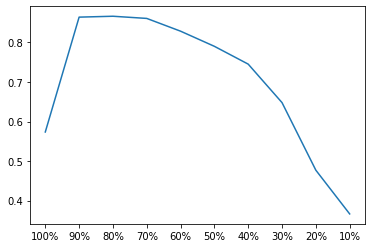

In [ ]:
pipe = make_pipeline(StandardScaler(), GaussianNB())

bayes_1_score = np.mean(cross_val_score(pipe,train_x_1,train_y_1,cv=10))

bayes_2_score = np.mean(cross_val_score(pipe,train_x_2,train_y_2,cv=10))

bayes_mean_accuracy_list = [(bayes_1_score + bayes_2_score)/2]

print("Bayes Classifiers Trial 1 & 2 Mean Accuracy: ", bayes_mean_accuracy_list[0])

for x in range(9):
  title = "PCA=" + str(90-(x*10)) + "%"

  bayes_1_pca_score = np.mean(cross_val_score(pipe,train_x_1_pca[x],train_y_1,cv=10))

  bayes_2_pca_score = np.mean(cross_val_score(pipe,train_x_2_pca[x],train_y_2,cv=10))

  bayes_mean_accuracy_list.append((bayes_1_pca_score + bayes_2_pca_score)/2)

  print("Bayes Classifiers Trial 1 & 2 "+ title +" Mean Accuracy: ", bayes_mean_accuracy_list[x+1])

plt.plot(pca_list,bayes_mean_accuracy_list)
plt.show()

In [ ]:
pipe = make_pipeline(StandardScaler(), GaussianNB())
bayes_1 = pipe.fit(train_x_1_pca[2], train_y_1)
bayes_1_predict = bayes_1.predict(test_x_1_pca[2])
bayes_1_score = bayes_1.score(test_x_1_pca[2], test_y_1)
bayes_1_confusion_matrix = confusion_matrix(test_y_1, bayes_1_predict, normalize="true")

pipe = make_pipeline(StandardScaler(), GaussianNB())
bayes_2 = pipe.fit(train_x_2_pca[2], train_y_2)
bayes_2_predict = bayes_2.predict(test_x_2_pca[2])
bayes_2_score = bayes_2.score(test_x_2_pca[2], test_y_2)
bayes_2_confusion_matrix = confusion_matrix(test_y_2, bayes_2_predict, normalize="true")

bayes_mean_accuracy = (bayes_1_score + bayes_2_score)/2

print("Gaussian Bayes Classifiers Trial 1 & 2 Mean Accuracy: ", bayes_mean_accuracy)

bayes_bonus_1_predict = bayes_1.predict(bonus_x_1_pca[2])
bayes_bonus_1_score = bayes_1.score(bonus_x_1_pca[2], bonus_test_y)
bayes_1_bonus_confusion_matrix = confusion_matrix(bonus_test_y, bayes_bonus_1_predict, normalize="true")

bayes_bonus_2_predict = bayes_2.predict(bonus_x_2_pca[2])
bayes_bonus_2_score = bayes_2.score(bonus_x_2_pca[2], bonus_test_y)
bayes_2_bonus_confusion_matrix = confusion_matrix(bonus_test_y, bayes_bonus_2_predict, normalize="true")

bayes_bonus_mean_accuracy = (bayes_bonus_1_score + bayes_bonus_2_score)/2

print("Gaussian Bayes Classifiers Trial 1 & 2 Mean Accuracy(Challenge Digits): ", bayes_bonus_mean_accuracy)

Gaussian Bayes Classifiers Trial 1 & 2 Mean Accuracy:  0.85025
Gaussian Bayes Classifiers Trial 1 & 2 Mean Accuracy(Challenge Digits):  0.6000000000000001


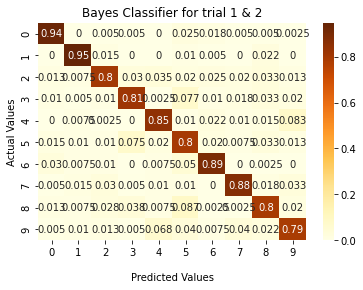

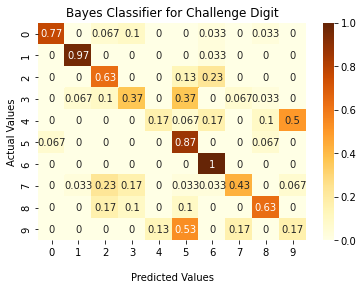

In [ ]:
confusion_matrix_heatmap((bayes_1_confusion_matrix + bayes_2_confusion_matrix)/2, "Bayes Classifier for trial 1 & 2")
confusion_matrix_heatmap((bayes_1_bonus_confusion_matrix + bayes_2_bonus_confusion_matrix)/2, "Bayes Classifier for Challenge Digit")

# Fisher's Discriminant

Linear Discriminant Classifiers Trial 1 & 2 Mean Accuracy:  0.7827500000000001
Linear Discriminant Classifiers Trial 1 & 2 PCA=90% Mean Accuracy:  0.8704999999999998
Linear Discriminant Classifiers Trial 1 & 2 PCA=80% Mean Accuracy:  0.8654999999999999
Linear Discriminant Classifiers Trial 1 & 2 PCA=70% Mean Accuracy:  0.853
Linear Discriminant Classifiers Trial 1 & 2 PCA=60% Mean Accuracy:  0.81725
Linear Discriminant Classifiers Trial 1 & 2 PCA=50% Mean Accuracy:  0.77475
Linear Discriminant Classifiers Trial 1 & 2 PCA=40% Mean Accuracy:  0.7307500000000001
Linear Discriminant Classifiers Trial 1 & 2 PCA=30% Mean Accuracy:  0.6432499999999999
Linear Discriminant Classifiers Trial 1 & 2 PCA=20% Mean Accuracy:  0.4664999999999999
Linear Discriminant Classifiers Trial 1 & 2 PCA=10% Mean Accuracy:  0.36475


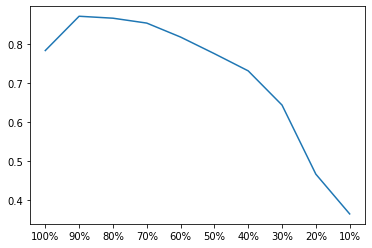

In [ ]:
pipe = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())

linear_discriminant_1_score = np.mean(cross_val_score(pipe,train_x_1,train_y_1,cv=10))

linear_discriminant_2_score = np.mean(cross_val_score(pipe,train_x_2,train_y_2,cv=10))

linear_discriminant_mean_accuracy_list = [(linear_discriminant_1_score + linear_discriminant_2_score)/2]

print("Linear Discriminant Classifiers Trial 1 & 2 Mean Accuracy: ", linear_discriminant_mean_accuracy_list[0])

for x in range(9):
  title = "PCA=" + str(90-(x*10)) + "%"

  linear_discriminant_1_pca_score = np.mean(cross_val_score(pipe,train_x_1_pca[x],train_y_1,cv=10))

  linear_discriminant_2_pca_score = np.mean(cross_val_score(pipe,train_x_2_pca[x],train_y_2,cv=10))

  linear_discriminant_mean_accuracy_list.append((linear_discriminant_1_pca_score + linear_discriminant_2_pca_score)/2)

  print("Linear Discriminant Classifiers Trial 1 & 2 "+ title +" Mean Accuracy: ", linear_discriminant_mean_accuracy_list[x+1])

plt.plot(pca_list,linear_discriminant_mean_accuracy_list)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminan

Quadratic Discriminant Classifiers Trial 1 & 2 Mean Accuracy:  0.25825
Quadratic Discriminant Classifiers Trial 1 & 2 PCA=90% Mean Accuracy:  0.9184999999999999
Quadratic Discriminant Classifiers Trial 1 & 2 PCA=80% Mean Accuracy:  0.93975
Quadratic Discriminant Classifiers Trial 1 & 2 PCA=70% Mean Accuracy:  0.9420000000000001
Quadratic Discriminant Classifiers Trial 1 & 2 PCA=60% Mean Accuracy:  0.9317500000000001
Quadratic Discriminant Classifiers Trial 1 & 2 PCA=50% Mean Accuracy:  0.8925000000000001
Quadratic Discriminant Classifiers Trial 1 & 2 PCA=40% Mean Accuracy:  0.8292499999999999
Quadratic Discriminant Classifiers Trial 1 & 2 PCA=30% Mean Accuracy:  0.7142499999999999
Quadratic Discriminant Classifiers Trial 1 & 2 PCA=20% Mean Accuracy:  0.5085
Quadratic Discriminant Classifiers Trial 1 & 2 PCA=10% Mean Accuracy:  0.3715


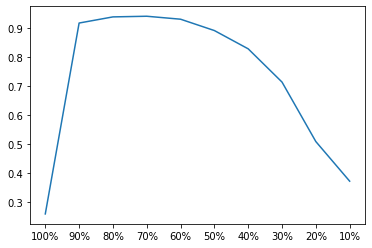

In [ ]:
pipe = make_pipeline(StandardScaler(), QuadraticDiscriminantAnalysis())

quadratic_discriminant_1_score = np.mean(cross_val_score(pipe,train_x_1,train_y_1,cv=10))

quadratic_discriminant_2_score = np.mean(cross_val_score(pipe,train_x_2,train_y_2,cv=10))

quadratic_discriminant_mean_accuracy_list = [(quadratic_discriminant_1_score + quadratic_discriminant_2_score)/2]

print("Quadratic Discriminant Classifiers Trial 1 & 2 Mean Accuracy: ", quadratic_discriminant_mean_accuracy_list[0])

for x in range(9):
  title = "PCA=" + str(90-(x*10)) + "%"

  quadratic_discriminant_1_pca_score = np.mean(cross_val_score(pipe,train_x_1_pca[x],train_y_1,cv=10))

  quadratic_discriminant_2_pca_score = np.mean(cross_val_score(pipe,train_x_2_pca[x],train_y_2,cv=10))

  quadratic_discriminant_mean_accuracy_list.append((quadratic_discriminant_1_pca_score + quadratic_discriminant_2_pca_score)/2)

  print("Quadratic Discriminant Classifiers Trial 1 & 2 "+ title +" Mean Accuracy: ", quadratic_discriminant_mean_accuracy_list[x+1])

plt.plot(pca_list,quadratic_discriminant_mean_accuracy_list)
plt.show()

In [ ]:
pipe = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())
linear_discriminant_1 = pipe.fit(train_x_1_pca[1], train_y_1)
linear_discriminant_1_predict = linear_discriminant_1.predict(test_x_1_pca[1])
linear_discriminant_1_score = linear_discriminant_1.score(test_x_1_pca[1], test_y_1)
linear_discriminant_1_confusion_matrix = confusion_matrix(test_y_1, linear_discriminant_1_predict, normalize="true")

pipe = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())
linear_discriminant_2 = pipe.fit(train_x_2_pca[1], train_y_2)
linear_discriminant_2_predict = linear_discriminant_2.predict(test_x_2_pca[1])
linear_discriminant_2_score = linear_discriminant_2.score(test_x_2_pca[1], test_y_2)
linear_discriminant_2_confusion_matrix = confusion_matrix(test_y_2, linear_discriminant_2_predict, normalize="true")

linear_discriminant_mean_accuracy = (linear_discriminant_1_score + linear_discriminant_2_score)/2

print("Linear Discriminant Classifiers Trial 1 & 2 Mean Accuracy: ", linear_discriminant_mean_accuracy)

pipe = make_pipeline(StandardScaler(), QuadraticDiscriminantAnalysis())
quadratic_discriminant_1 = pipe.fit(train_x_1_pca[3], train_y_1)
quadratic_discriminant_1_predict = quadratic_discriminant_1.predict(test_x_1_pca[3])
quadratic_discriminant_1_score = quadratic_discriminant_1.score(test_x_1_pca[3], test_y_1)
quadratic_discriminant_1_confusion_matrix = confusion_matrix(test_y_1, quadratic_discriminant_1_predict, normalize="true")

pipe = make_pipeline(StandardScaler(), QuadraticDiscriminantAnalysis())
quadratic_discriminant_2 = pipe.fit(train_x_2_pca[3], train_y_2)
quadratic_discriminant_2_predict = quadratic_discriminant_2.predict(test_x_2_pca[3])
quadratic_discriminant_2_score = quadratic_discriminant_2.score(test_x_2_pca[3], test_y_2)
quadratic_discriminant_2_confusion_matrix = confusion_matrix(test_y_2, quadratic_discriminant_2_predict, normalize="true")

quadratic_discriminant_mean_accuracy = (quadratic_discriminant_1_score + quadratic_discriminant_2_score)/2

print("Quadratic Discriminant Classifiers Trial 1 & 2 Mean Accuracy: ", quadratic_discriminant_mean_accuracy)

linear_discriminant_bonus_1_predict = linear_discriminant_1.predict(bonus_x_1_pca[1])
linear_discriminant_bonus_1_score = linear_discriminant_1.score(bonus_x_1_pca[1], bonus_test_y)
linear_discriminant_bonus_1_confusion_matrix = confusion_matrix(bonus_test_y, linear_discriminant_bonus_1_predict, normalize="true")

linear_discriminant_bonus_2_predict = linear_discriminant_2.predict(bonus_x_2_pca[1])
linear_discriminant_bonus_2_score = linear_discriminant_2.score(bonus_x_2_pca[1], bonus_test_y)
linear_discriminant_bonus_2_confusion_matrix = confusion_matrix(bonus_test_y, linear_discriminant_bonus_2_predict, normalize="true")

linear_discriminant_bonus_mean_accuracy = (linear_discriminant_bonus_1_score + linear_discriminant_bonus_2_score)/2

print("Linear Discriminant Classifiers Trial 1 & 2 Mean Accuracy(Challenge Digits): ", linear_discriminant_bonus_mean_accuracy)

quadratic_discriminant_bonus_1_predict = quadratic_discriminant_1.predict(bonus_x_1_pca[3])
quadratic_discriminant_bonus_1_score = quadratic_discriminant_1.score(bonus_x_1_pca[3], bonus_test_y)
quadratic_discriminant_bonus_1_confusion_matrix = confusion_matrix(bonus_test_y, quadratic_discriminant_bonus_1_predict, normalize="true")

quadratic_discriminant_bonus_2_predict = quadratic_discriminant_2.predict(bonus_x_2_pca[3])
quadratic_discriminant_bonus_2_score = quadratic_discriminant_2.score(bonus_x_2_pca[3], bonus_test_y)
quadratic_discriminant_bonus_2_confusion_matrix = confusion_matrix(bonus_test_y, quadratic_discriminant_bonus_2_predict, normalize="true")

quadratic_discriminant_bonus_mean_accuracy = (quadratic_discriminant_bonus_1_score + quadratic_discriminant_bonus_2_score)/2

print("Quadratic Discriminant Classifiers Trial 1 & 2 Mean Accuracy(Challenge Digits): ", quadratic_discriminant_bonus_mean_accuracy)

Linear Discriminant Classifiers Trial 1 & 2 Mean Accuracy:  0.86
Quadratic Discriminant Classifiers Trial 1 & 2 Mean Accuracy:  0.92725
Linear Discriminant Classifiers Trial 1 & 2 Mean Accuracy(Challenge Digits):  0.5966666666666667
Quadratic Discriminant Classifiers Trial 1 & 2 Mean Accuracy(Challenge Digits):  0.69


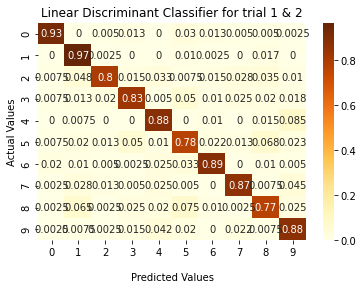

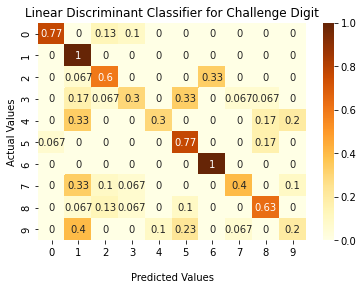

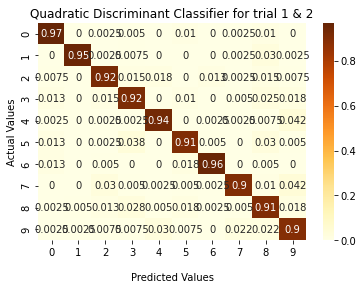

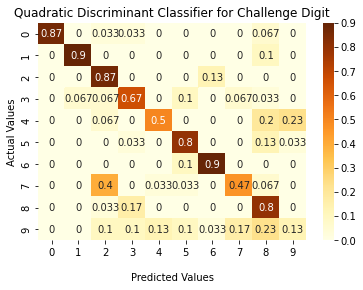

In [ ]:
confusion_matrix_heatmap((linear_discriminant_1_confusion_matrix + linear_discriminant_2_confusion_matrix)/2, "Linear Discriminant Classifier for trial 1 & 2")
confusion_matrix_heatmap((linear_discriminant_bonus_1_confusion_matrix + linear_discriminant_bonus_2_confusion_matrix)/2, "Linear Discriminant Classifier for Challenge Digit")
confusion_matrix_heatmap((quadratic_discriminant_1_confusion_matrix + quadratic_discriminant_2_confusion_matrix)/2, "Quadratic Discriminant Classifier for trial 1 & 2")
confusion_matrix_heatmap((quadratic_discriminant_bonus_1_confusion_matrix + quadratic_discriminant_bonus_2_confusion_matrix)/2, "Quadratic Discriminant Classifier for Challenge Digit")

# SVM

SVM (Kernel=linear) Classifiers Trial 1 & 2 Mean Accuracy:  0.9019999999999999
SVM (Kernel=linear) Classifiers Trial 1 & 2 PCA=90% Mean Accuracy:  0.8714999999999999
SVM (Kernel=linear) Classifiers Trial 1 & 2 PCA=80% Mean Accuracy:  0.8775000000000001
SVM (Kernel=linear) Classifiers Trial 1 & 2 PCA=70% Mean Accuracy:  0.87725
SVM (Kernel=linear) Classifiers Trial 1 & 2 PCA=60% Mean Accuracy:  0.8715000000000002
SVM (Kernel=linear) Classifiers Trial 1 & 2 PCA=50% Mean Accuracy:  0.8444999999999999
SVM (Kernel=linear) Classifiers Trial 1 & 2 PCA=40% Mean Accuracy:  0.7875
SVM (Kernel=linear) Classifiers Trial 1 & 2 PCA=30% Mean Accuracy:  0.6864999999999999
SVM (Kernel=linear) Classifiers Trial 1 & 2 PCA=20% Mean Accuracy:  0.4902500000000001
SVM (Kernel=linear) Classifiers Trial 1 & 2 PCA=10% Mean Accuracy:  0.372


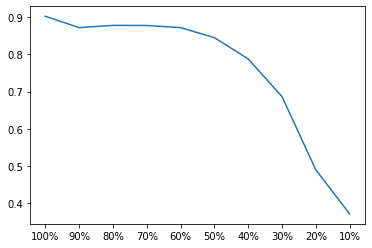

In [ ]:
pipe = make_pipeline(StandardScaler(), SVC(kernel='linear'))

SVM_linear_1_score = np.mean(cross_val_score(pipe,train_x_1,train_y_1,cv=10))

SVM_linear_2_score = np.mean(cross_val_score(pipe,train_x_2,train_y_2,cv=10))

SVM_linear_mean_accuracy_list = [(SVM_linear_1_score + SVM_linear_2_score)/2]

print("SVM (Kernel=linear) Classifiers Trial 1 & 2 Mean Accuracy: ", SVM_linear_mean_accuracy_list[0])

for x in range(9):
  title = "PCA=" + str(90-(x*10)) + "%"

  SVM_linear_1_pca_score = np.mean(cross_val_score(pipe,train_x_1_pca[x],train_y_1,cv=10))

  SVM_linear_2_pca_score = np.mean(cross_val_score(pipe,train_x_2_pca[x],train_y_2,cv=10))

  SVM_linear_mean_accuracy_list.append((SVM_linear_1_pca_score + SVM_linear_2_pca_score)/2)

  print("SVM (Kernel=linear) Classifiers Trial 1 & 2 "+ title +" Mean Accuracy: ", SVM_linear_mean_accuracy_list[x+1])

plt.plot(pca_list,SVM_linear_mean_accuracy_list)
plt.show()

SVM (Kernel=poly) Classifiers Trial 1 & 2 Mean Accuracy:  0.7670000000000001
SVM (Kernel=poly) Classifiers Trial 1 & 2 PCA=90% Mean Accuracy:  0.837
SVM (Kernel=poly) Classifiers Trial 1 & 2 PCA=80% Mean Accuracy:  0.92825
SVM (Kernel=poly) Classifiers Trial 1 & 2 PCA=70% Mean Accuracy:  0.9332500000000001
SVM (Kernel=poly) Classifiers Trial 1 & 2 PCA=60% Mean Accuracy:  0.9257500000000001
SVM (Kernel=poly) Classifiers Trial 1 & 2 PCA=50% Mean Accuracy:  0.8840000000000001
SVM (Kernel=poly) Classifiers Trial 1 & 2 PCA=40% Mean Accuracy:  0.8295
SVM (Kernel=poly) Classifiers Trial 1 & 2 PCA=30% Mean Accuracy:  0.70525
SVM (Kernel=poly) Classifiers Trial 1 & 2 PCA=20% Mean Accuracy:  0.50875
SVM (Kernel=poly) Classifiers Trial 1 & 2 PCA=10% Mean Accuracy:  0.35575


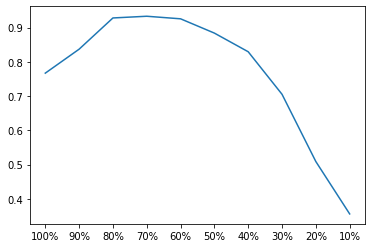

In [ ]:
pipe = make_pipeline(StandardScaler(), SVC(kernel='poly'))

SVM_poly_1_score = np.mean(cross_val_score(pipe,train_x_1,train_y_1,cv=10))

SVM_poly_2_score = np.mean(cross_val_score(pipe,train_x_2,train_y_2,cv=10))

SVM_poly_mean_accuracy_list = [(SVM_poly_1_score + SVM_poly_2_score)/2]

print("SVM (Kernel=poly) Classifiers Trial 1 & 2 Mean Accuracy: ", SVM_poly_mean_accuracy_list[0])

for x in range(9):
  title = "PCA=" + str(90-(x*10)) + "%"

  SVM_poly_1_pca_score = np.mean(cross_val_score(pipe,train_x_1_pca[x], train_y_1,cv=10))

  SVM_poly_2_pca_score = np.mean(cross_val_score(pipe,train_x_2_pca[x], train_y_2,cv=10))

  SVM_poly_mean_accuracy_list.append((SVM_poly_1_pca_score + SVM_poly_2_pca_score)/2)

  print("SVM (Kernel=poly) Classifiers Trial 1 & 2 "+ title +" Mean Accuracy: ", SVM_poly_mean_accuracy_list[x+1])

plt.plot(pca_list,SVM_poly_mean_accuracy_list)
plt.show()

SVM (Kernel=rbf) Classifiers Trial 1 & 2 Mean Accuracy:  0.9337500000000001
SVM (Kernel=rbf) Classifiers Trial 1 & 2 PCA=90% Mean Accuracy:  0.9305000000000001
SVM (Kernel=rbf) Classifiers Trial 1 & 2 PCA=80% Mean Accuracy:  0.942
SVM (Kernel=rbf) Classifiers Trial 1 & 2 PCA=70% Mean Accuracy:  0.94675
SVM (Kernel=rbf) Classifiers Trial 1 & 2 PCA=60% Mean Accuracy:  0.9337500000000001
SVM (Kernel=rbf) Classifiers Trial 1 & 2 PCA=50% Mean Accuracy:  0.903
SVM (Kernel=rbf) Classifiers Trial 1 & 2 PCA=40% Mean Accuracy:  0.854
SVM (Kernel=rbf) Classifiers Trial 1 & 2 PCA=30% Mean Accuracy:  0.736
SVM (Kernel=rbf) Classifiers Trial 1 & 2 PCA=20% Mean Accuracy:  0.52875
SVM (Kernel=rbf) Classifiers Trial 1 & 2 PCA=10% Mean Accuracy:  0.382


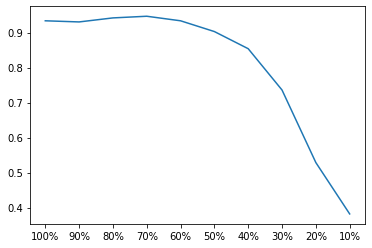

In [ ]:
pipe = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

SVM_rbf_1_score = np.mean(cross_val_score(pipe,train_x_1,train_y_1,cv=10))

SVM_rbf_2_score = np.mean(cross_val_score(pipe,train_x_2,train_y_2,cv=10))

SVM_rbf_mean_accuracy_list = [(SVM_rbf_1_score + SVM_rbf_2_score)/2]

print("SVM (Kernel=rbf) Classifiers Trial 1 & 2 Mean Accuracy: ", SVM_rbf_mean_accuracy_list[0])

for x in range(9):
  title = "PCA=" + str(90-(x*10)) + "%"

  SVM_rbf_1_pca_score = np.mean(cross_val_score(pipe,train_x_1_pca[x],train_y_1,cv=10))

  SVM_rbf_2_pca_score = np.mean(cross_val_score(pipe,train_x_2_pca[x],train_y_2,cv=10))

  SVM_rbf_mean_accuracy_list.append((SVM_rbf_1_pca_score + SVM_rbf_2_pca_score)/2)

  print("SVM (Kernel=rbf) Classifiers Trial 1 & 2 "+ title +" Mean Accuracy: ", SVM_rbf_mean_accuracy_list[x+1])

plt.plot(pca_list,SVM_rbf_mean_accuracy_list)
plt.show()

In [ ]:
# cv for 3 different kernels svm
def cv_svm_linear(train_x,train_y):
  C_range = np.arange(0.1,10.1,0.1)
  C_scores = 0
  scores_list = []
  # cv_C = []
  for C in C_range:
    scores = []
    svm = make_pipeline(StandardScaler(), SVC(kernel='linear',C=C))
    scores.append(cross_val_score(svm,train_x,train_y,cv=10,scoring='accuracy'))
    scores_list.append(np.mean(scores))
    if C_scores < np.mean(scores):
      cv_C = C
      C_scores = np.mean(scores)
    # elif C_scores == np.mean(scores):
    #   cv_C.append(C)
  # plt.plot(C_range,scores_list)
  # plt.show()
  # print(C_scores)
  return scores_list

def cv_svm_poly(train_x,train_y):
  C_range = np.arange(0.1,10.1,0.1)
  C_scores = 0
  scores_list = []
  # cv_C = []
  for C in C_range:
    scores = []
    svm = make_pipeline(StandardScaler(), SVC(kernel='poly',C=C))
    scores.append(cross_val_score(svm,train_x,train_y,cv=10,scoring='accuracy'))
    scores_list.append(np.mean(scores))
    if C_scores < np.mean(scores):
      cv_C = C
      C_scores = np.mean(scores)
    # elif C_scores == np.mean(scores):
    #   cv_C.append(C)
  # plt.plot(C_range,scores_list)
  # plt.show()
  # print(C_scores)
  return scores_list

def cv_svm_rbf(train_x,train_y):
  C_range = np.arange(0.1,10.1,0.1)
  C_scores = 0
  scores_list = []
  # cv_C = []
  for C in C_range:
    scores = []
    svm = make_pipeline(StandardScaler(), SVC(kernel='rbf',C=C))
    scores.append(cross_val_score(svm,train_x,train_y,cv=10,scoring='accuracy'))
    scores_list.append(np.mean(scores))
    if C_scores < np.mean(scores):
      cv_C = C
      C_scores = np.mean(scores)
    # elif C_scores == np.mean(scores):
    #   cv_C.append(C)
  # plt.plot(C_range,scores_list)
  # plt.show()
  # print(C_scores)
  return scores_list

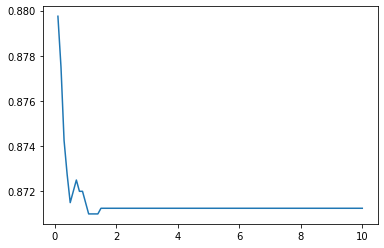

0.1


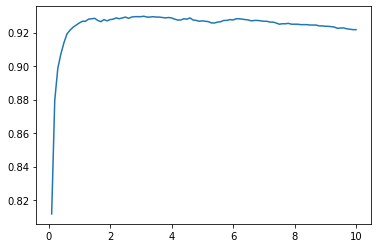

3.1


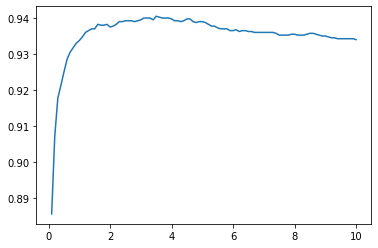

3.5000000000000004


In [ ]:
C_range = np.arange(0.1,10.1,0.1)

linear_C_1_list = cv_svm_linear(train_x_1_pca[0], train_y_1)
linear_C_2_list = cv_svm_linear(train_x_2_pca[0], train_y_2)
linear_C_list_mean = (np.array(linear_C_1_list) + np.array(linear_C_2_list))/2
plt.plot(C_range,linear_C_list_mean)
plt.show()
print(C_range[np.argmax(linear_C_list_mean)])

poly_C_1_list = cv_svm_poly(train_x_1_pca[3], train_y_1)
poly_C_2_list = cv_svm_poly(train_x_2_pca[3], train_y_2)
poly_C_list_mean = (np.array(poly_C_1_list) + np.array(poly_C_2_list))/2
plt.plot(C_range,poly_C_list_mean)
plt.show()
print(C_range[np.argmax(poly_C_list_mean)])

rbf_C_1_list = cv_svm_rbf(train_x_1_pca[3], train_y_1)
rbf_C_2_list = cv_svm_rbf(train_x_2_pca[3], train_y_2)
rbf_C_list_mean = (np.array(rbf_C_1_list) + np.array(rbf_C_2_list))/2
plt.plot(C_range,rbf_C_list_mean)
plt.show()
print(C_range[np.argmax(rbf_C_list_mean)])

In [ ]:
pipe = make_pipeline(StandardScaler(), SVC(kernel='linear', C=0.1))
SVM_linear_1 = pipe.fit(train_x_1_pca[0], train_y_1)
SVM_linear_1_predict = SVM_linear_1.predict(test_x_1_pca[0])
SVM_linear_1_score = SVM_linear_1.score(test_x_1_pca[0], test_y_1)
SVM_linear_1_confusion_matrix = confusion_matrix(test_y_1, SVM_linear_1_predict, normalize="true")

pipe = make_pipeline(StandardScaler(), SVC(kernel='linear', C=0.1))
SVM_linear_2 = pipe.fit(train_x_2_pca[0], train_y_2)
SVM_linear_2_predict = SVM_linear_2.predict(test_x_2_pca[0])
SVM_linear_2_score = SVM_linear_2.score(test_x_2_pca[0], test_y_2)
SVM_linear_2_confusion_matrix = confusion_matrix(test_y_2, SVM_linear_2_predict, normalize="true")

SVM_linear_mean_accuracy = (SVM_linear_1_score + SVM_linear_2_score)/2

print("SVM (Kernel=linear) Classifiers Trial 1 & 2 Mean Accuracy: ", SVM_linear_mean_accuracy)

pipe = make_pipeline(StandardScaler(), SVC(kernel='poly', C=3.1))
SVM_poly_1 = pipe.fit(train_x_1_pca[3], train_y_1)
SVM_poly_1_predict = SVM_poly_1.predict(test_x_1_pca[3])
SVM_poly_1_score = SVM_poly_1.score(test_x_1_pca[3], test_y_1)
SVM_poly_1_confusion_matrix = confusion_matrix(test_y_1, SVM_poly_1_predict, normalize="true")

pipe = make_pipeline(StandardScaler(), SVC(kernel='poly', C=3.1))
SVM_poly_2 = pipe.fit(train_x_2_pca[3], train_y_2)
SVM_poly_2_predict = SVM_poly_2.predict(test_x_2_pca[3])
SVM_poly_2_score = SVM_poly_2.score(test_x_2_pca[3], test_y_2)
SVM_poly_2_confusion_matrix = confusion_matrix(test_y_2, SVM_poly_2_predict, normalize="true")

SVM_poly_mean_accuracy = (SVM_poly_1_score + SVM_poly_2_score)/2

print("SVM (Kernel=poly) Classifiers Trial 1 & 2 Mean Accuracy: ", SVM_poly_mean_accuracy)

pipe = make_pipeline(StandardScaler(), SVC(kernel='rbf',C=3.5))
SVM_rbf_1 = pipe.fit(train_x_1_pca[3], train_y_1)
SVM_rbf_1_predict = SVM_rbf_1.predict(test_x_1_pca[3])
SVM_rbf_1_score = SVM_rbf_1.score(test_x_1_pca[3], test_y_1)
SVM_rbf_1_confusion_matrix = confusion_matrix(test_y_1, SVM_rbf_1_predict, normalize="true")

pipe = make_pipeline(StandardScaler(), SVC(kernel='rbf',C=3.5))
SVM_rbf_2 = pipe.fit(train_x_2_pca[3], train_y_2)
SVM_rbf_2_predict = SVM_rbf_2.predict(test_x_2_pca[3])
SVM_rbf_2_score = SVM_rbf_2.score(test_x_2_pca[3], test_y_2)
SVM_rbf_2_confusion_matrix = confusion_matrix(test_y_2, SVM_rbf_2_predict, normalize="true")

SVM_rbf_mean_accuracy = (SVM_rbf_1_score + SVM_rbf_2_score)/2

print("SVM (Kernel=rbf) Classifiers Trial 1 & 2 Mean Accuracy: ", SVM_rbf_mean_accuracy)

SVM_linear_bonus_1_predict = SVM_linear_1.predict(bonus_x_1_pca[0])
SVM_linear_bonus_1_score = SVM_linear_1.score(bonus_x_1_pca[0], bonus_test_y)
SVM_linear_bonus_1_confusion_matrix = confusion_matrix(bonus_test_y, SVM_linear_bonus_1_predict, normalize="true")

SVM_linear_bonus_2_predict = SVM_linear_2.predict(bonus_x_2_pca[0])
SVM_linear_bonus_2_score = SVM_linear_2.score(bonus_x_2_pca[0], bonus_test_y)
SVM_linear_bonus_2_confusion_matrix = confusion_matrix(bonus_test_y, SVM_linear_bonus_2_predict, normalize="true")

SVM_linear_bonus_mean_accuracy = (SVM_linear_bonus_1_score + SVM_linear_bonus_2_score)/2

print("SVM (Kernel=linear) Classifiers Trial 1 & 2 Mean Accuracy(Challenge Digits): ", SVM_linear_bonus_mean_accuracy)

SVM_poly_bonus_1_predict = SVM_poly_1.predict(bonus_x_1_pca[3])
SVM_poly_bonus_1_score = SVM_poly_1.score(bonus_x_1_pca[3], bonus_test_y)
SVM_poly_bonus_1_confusion_matrix = confusion_matrix(bonus_test_y, SVM_poly_bonus_1_predict, normalize="true")

SVM_poly_bonus_2_predict = SVM_poly_2.predict(bonus_x_2_pca[3])
SVM_poly_bonus_2_score = SVM_poly_2.score(bonus_x_2_pca[3], bonus_test_y)
SVM_poly_bonus_2_confusion_matrix = confusion_matrix(bonus_test_y, SVM_poly_bonus_2_predict, normalize="true")

SVM_poly_bonus_mean_accuracy = (SVM_poly_bonus_1_score + SVM_poly_bonus_2_score)/2

print("SVM (Kernel=poly) Classifiers Trial 1 & 2 Mean Accuracy(Challenge Digits): ", SVM_poly_bonus_mean_accuracy)

SVM_rbf_bonus_1_predict = SVM_rbf_1.predict(bonus_x_1_pca[3])
SVM_rbf_bonus_1_score = SVM_rbf_1.score(bonus_x_1_pca[3], bonus_test_y)
SVM_rbf_bonus_1_confusion_matrix = confusion_matrix(bonus_test_y, SVM_rbf_bonus_1_predict, normalize="true")

SVM_rbf_bonus_2_predict = SVM_rbf_2.predict(bonus_x_2_pca[3])
SVM_rbf_bonus_2_score = SVM_rbf_2.score(bonus_x_2_pca[3], bonus_test_y)
SVM_rbf_bonus_2_confusion_matrix = confusion_matrix(bonus_test_y, SVM_rbf_bonus_2_predict, normalize="true")

SVM_rbf_bonus_mean_accuracy = (SVM_rbf_bonus_1_score + SVM_rbf_bonus_2_score)/2

print("SVM (Kernel=rbf) Classifiers Trial 1 & 2 Mean Accuracy(Challenge Digits): ", SVM_rbf_bonus_mean_accuracy)

SVM (Kernel=linear) Classifiers Trial 1 & 2 Mean Accuracy:  0.885
SVM (Kernel=poly) Classifiers Trial 1 & 2 Mean Accuracy:  0.92325
SVM (Kernel=rbf) Classifiers Trial 1 & 2 Mean Accuracy:  0.9337500000000001
SVM (Kernel=linear) Classifiers Trial 1 & 2 Mean Accuracy(Challenge Digits):  0.6266666666666667
SVM (Kernel=poly) Classifiers Trial 1 & 2 Mean Accuracy(Challenge Digits):  0.6666666666666667
SVM (Kernel=rbf) Classifiers Trial 1 & 2 Mean Accuracy(Challenge Digits):  0.7033333333333334


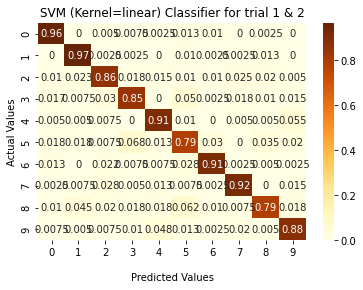

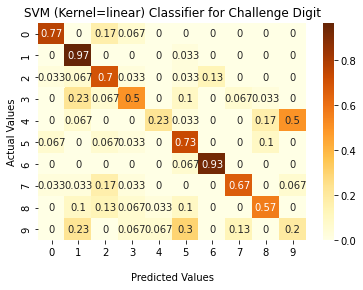

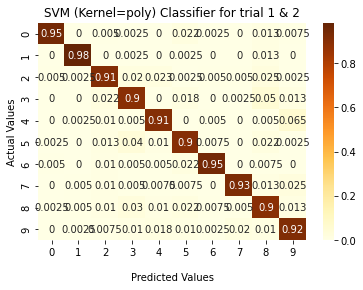

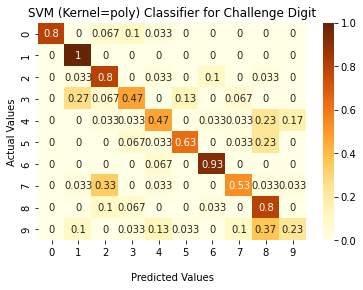

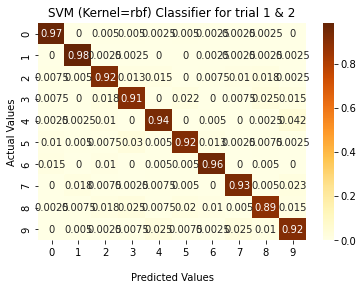

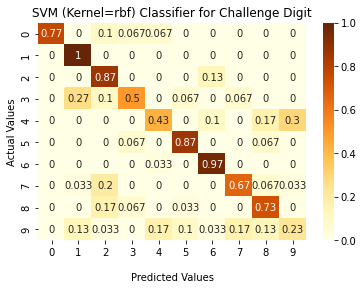

In [ ]:
confusion_matrix_heatmap((SVM_linear_1_confusion_matrix + SVM_linear_2_confusion_matrix)/2, "SVM (Kernel=linear) Classifier for trial 1 & 2")
confusion_matrix_heatmap((SVM_linear_bonus_1_confusion_matrix + SVM_linear_bonus_2_confusion_matrix)/2, "SVM (Kernel=linear) Classifier for Challenge Digit")
confusion_matrix_heatmap((SVM_poly_1_confusion_matrix + SVM_poly_2_confusion_matrix)/2, "SVM (Kernel=poly) Classifier for trial 1 & 2")
confusion_matrix_heatmap((SVM_poly_bonus_1_confusion_matrix + SVM_poly_bonus_2_confusion_matrix)/2, "SVM (Kernel=poly) Classifier for Challenge Digit")
confusion_matrix_heatmap((SVM_rbf_1_confusion_matrix + SVM_rbf_2_confusion_matrix)/2, "SVM (Kernel=rbf) Classifier for trial 1 & 2")
confusion_matrix_heatmap((SVM_rbf_bonus_1_confusion_matrix + SVM_rbf_bonus_2_confusion_matrix)/2, "SVM (Kernel=rbf) Classifier for Challenge Digit")

# Logistic Regression

Logistic Classifiers Trial 1 & 2 Mean Accuracy:  0.88025
Logistic Classifiers Trial 1 & 2 PCA=90% Mean Accuracy:  0.865
Logistic Classifiers Trial 1 & 2 PCA=80% Mean Accuracy:  0.8815
Logistic Classifiers Trial 1 & 2 PCA=70% Mean Accuracy:  0.8760000000000001
Logistic Classifiers Trial 1 & 2 PCA=60% Mean Accuracy:  0.851
Logistic Classifiers Trial 1 & 2 PCA=50% Mean Accuracy:  0.81125
Logistic Classifiers Trial 1 & 2 PCA=40% Mean Accuracy:  0.76075
Logistic Classifiers Trial 1 & 2 PCA=30% Mean Accuracy:  0.6637500000000001
Logistic Classifiers Trial 1 & 2 PCA=20% Mean Accuracy:  0.476
Logistic Classifiers Trial 1 & 2 PCA=10% Mean Accuracy:  0.368


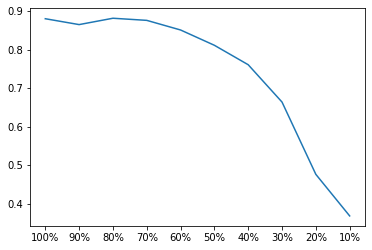

In [ ]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# logistic_1 = pipe.fit(train_x_1, train_y_1)
# logistic_1_predict = logistic_1.predict(test_x_1)
# logistic_1_score = logistic_1.score(test_x_1, test_y_1)
logistic_1_score = np.mean(cross_val_score(pipe,train_x_1,train_y_1,cv=10))
# logistic_1_confusion_matrix = confusion_matrix(test_y_1, logistic_1_predict, normalize="true")

# logistic_2 = pipe.fit(train_x_2, train_y_2)
# logistic_2_predict = logistic_2.predict(test_x_2)
# logistic_2_score = logistic_2.score(test_x_2, test_y_2)
logistic_2_score = np.mean(cross_val_score(pipe,train_x_2,train_y_2,cv=10))
# logistic_2_confusion_matrix = confusion_matrix(test_y_2, logistic_2_predict, normalize="true")

logistic_mean_accuracy_list = [(logistic_1_score + logistic_2_score)/2]

print("Logistic Classifiers Trial 1 & 2 Mean Accuracy: ", logistic_mean_accuracy_list[0])

for x in range(9):
  title = "PCA=" + str(90-(x*10)) + "%"

  # logistic_1_pca = pipe.fit(train_x_1_pca[x], train_y_1)
  # logistic_1_pca_predict = logistic_1_pca.predict(test_x_1_pca[x])
  # logistic_1_pca_score = logistic_1_pca.score(test_x_1_pca[x], test_y_1)
  logistic_1_pca_score = np.mean(cross_val_score(pipe,train_x_1_pca[x],train_y_1,cv=10))
  # logistic_1_pca_confusion_matrix = confusion_matrix(test_y_1, logistic_1_pca_predict, normalize="true")

  # logistic_2_pca = pipe.fit(train_x_2_pca[x], train_y_2)
  # logistic_2_pca_predict = logistic_2_pca.predict(test_x_2_pca[x])
  # logistic_2_pca_score = logistic_2_pca.score(test_x_2_pca[x], test_y_2)
  logistic_2_pca_score = np.mean(cross_val_score(pipe,train_x_2_pca[x],train_y_2,cv=10))
  # logistic_2_pca_confusion_matrix = confusion_matrix(test_y_2, logistic_2_pca_predict, normalize="true")

  logistic_mean_accuracy_list.append((logistic_1_pca_score + logistic_2_pca_score)/2)

  print("Logistic Classifiers Trial 1 & 2 "+ title +" Mean Accuracy: ", logistic_mean_accuracy_list[x+1])

plt.plot(pca_list,logistic_mean_accuracy_list)
plt.show()

In [ ]:
def cv_logistic(train_x,train_y):
  C_range = np.arange(0.1,10.1,0.1)
  C_scores = 0
  scores_list = []
  # cv_C = []
  for C in C_range:
    scores = []
    svm = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000,C=C))
    scores.append(cross_val_score(svm,train_x,train_y,cv=10,scoring='accuracy'))
    scores_list.append(np.mean(scores))
    if C_scores < np.mean(scores):
      cv_C = C
      C_scores = np.mean(scores)
    # elif C_scores == np.mean(scores):
    #   cv_C.append(C)
  # plt.plot(C_range,scores_list)
  # plt.show()
  # print(C_scores)
  return scores_list

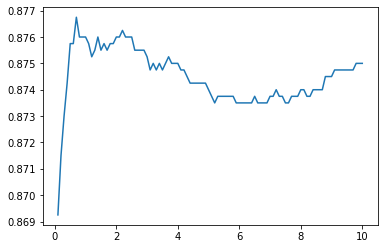

0.7000000000000001


In [ ]:
C_range = np.arange(0.1,10.1,0.1)

logistic_C_1_list = cv_logistic(train_x_1_pca[2], train_y_1)
logistic_C_2_list = cv_logistic(train_x_2_pca[2], train_y_2)
logistic_C_list_mean = (np.array(logistic_C_1_list) + np.array(logistic_C_2_list))/2
plt.plot(C_range,logistic_C_list_mean)
plt.show()
print(C_range[np.argmax(logistic_C_list_mean)])

In [ ]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000,C=0.7))
logistic_1 = pipe.fit(train_x_1_pca[2], train_y_1)
logistic_1_predict = logistic_1.predict(test_x_1_pca[2])
logistic_1_score = logistic_1.score(test_x_1_pca[2], test_y_1)
logistic_1_confusion_matrix = confusion_matrix(test_y_1, logistic_1_predict, normalize="true")

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000,C=0.7))
logistic_2 = pipe.fit(train_x_2_pca[2], train_y_2)
logistic_2_predict = logistic_2.predict(test_x_2_pca[2])
logistic_2_score = logistic_2.score(test_x_2_pca[2], test_y_2)
logistic_2_confusion_matrix = confusion_matrix(test_y_2, logistic_2_predict, normalize="true")

logistic_mean_accuracy = (logistic_1_score + logistic_2_score)/2

print("Logistic Regression Classifiers Trial 1 & 2 Mean Accuracy: ", logistic_mean_accuracy)

logistic_bonus_1_predict = logistic_1.predict(bonus_x_1_pca[2])
logistic_bonus_1_score = logistic_1.score(bonus_x_1_pca[2], bonus_test_y)
logistic_bonus_1_confusion_matrix = confusion_matrix(bonus_test_y, logistic_bonus_1_predict, normalize="true")

logistic_bonus_2_predict = logistic_2.predict(bonus_x_2_pca[2])
logistic_bonus_2_score = logistic_2.score(bonus_x_2_pca[2], bonus_test_y)
logistic_bonus_2_confusion_matrix = confusion_matrix(bonus_test_y, logistic_bonus_2_predict, normalize="true")

logistic_bonus_mean_accuracy = (logistic_bonus_1_score + logistic_bonus_2_score)/2

print("Logistic Regression Classifiers Trial 1 & 2 Mean Accuracy(Challenge Digits): ", logistic_bonus_mean_accuracy)

Logistic Regression Classifiers Trial 1 & 2 Mean Accuracy:  0.87325
Logistic Regression Classifiers Trial 1 & 2 Mean Accuracy(Challenge Digits):  0.5933333333333333


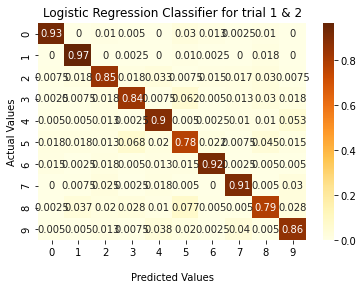

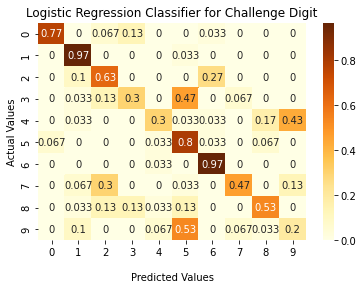

In [ ]:
confusion_matrix_heatmap((logistic_1_confusion_matrix + logistic_2_confusion_matrix)/2, "Logistic Regression Classifier for trial 1 & 2")
confusion_matrix_heatmap((logistic_bonus_1_confusion_matrix + logistic_bonus_2_confusion_matrix)/2, "Logistic Regression Classifier for Challenge Digit")

#Perceptron

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
max_iter = [1000, 2000, 5000, 10000]
alpha = [0.0001, 0.001, 0.01, 0.1]
random_grid = {
               'max_iter': max_iter,
               'alpha': alpha,
               }
pcn = Perceptron()
pcn_random = RandomizedSearchCV(estimator = pcn, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=0, random_state=42, n_jobs = -1)
pcn_random.fit(x, y)
pcn_random.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'alpha': 0.0001, 'max_iter': 1000}

Perceptron Classifiers Trial 1 & 2 Mean Accuracy:  0.812
x data set is train_x_1_pca [ 0 ], Perceptron Classifiers Trial 1 & 2 PCA=90% Mean Accuracy:  0.8407500000000001
x data set is train_x_1_pca [ 1 ], Perceptron Classifiers Trial 1 & 2 PCA=80% Mean Accuracy:  0.83775
x data set is train_x_1_pca [ 2 ], Perceptron Classifiers Trial 1 & 2 PCA=70% Mean Accuracy:  0.8089999999999999
x data set is train_x_1_pca [ 3 ], Perceptron Classifiers Trial 1 & 2 PCA=60% Mean Accuracy:  0.75875
x data set is train_x_1_pca [ 4 ], Perceptron Classifiers Trial 1 & 2 PCA=50% Mean Accuracy:  0.6705
x data set is train_x_1_pca [ 5 ], Perceptron Classifiers Trial 1 & 2 PCA=40% Mean Accuracy:  0.5974999999999999
x data set is train_x_1_pca [ 6 ], Perceptron Classifiers Trial 1 & 2 PCA=30% Mean Accuracy:  0.4765
x data set is train_x_1_pca [ 7 ], Perceptron Classifiers Trial 1 & 2 PCA=20% Mean Accuracy:  0.34125
x data set is train_x_1_pca [ 8 ], Perceptron Classifiers Trial 1 & 2 PCA=10% Mean Accuracy:  0.

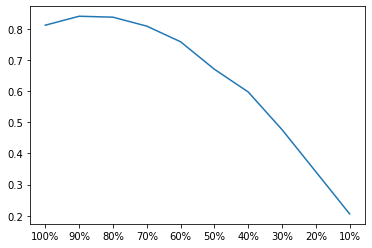

In [ ]:
pipe = make_pipeline(StandardScaler(), Perceptron())
Perceptron_1_score = np.mean(cross_val_score(pipe,train_x_1,train_y_1,cv=10))
Perceptron_2_score = np.mean(cross_val_score(pipe,train_x_2,train_y_2,cv=10))
Perceptron_mean_accuracy_list = [(Perceptron_1_score + Perceptron_2_score)/2]
print("Perceptron Classifiers Trial 1 & 2 Mean Accuracy: ", Perceptron_mean_accuracy_list[0])
for count in range(9):
  title = "PCA=" + str(90-(count*10)) + "%"
  Perceptron_1_pca_score = np.mean(cross_val_score(pipe,train_x_1_pca[count],train_y_1,cv=10))
  Perceptron_2_pca_score = np.mean(cross_val_score(pipe,train_x_2_pca[count],train_y_2,cv=10))
  Perceptron_mean_accuracy_list.append((Perceptron_1_pca_score + Perceptron_2_pca_score)/2)
  print("x data set is train_x_1_pca [",count,"], Perceptron Classifiers Trial 1 & 2 "+ title +" Mean Accuracy: ", Perceptron_mean_accuracy_list[count+1])
plt.plot(pca_list,Perceptron_mean_accuracy_list)
plt.show()

In [ ]:
pipe = make_pipeline(StandardScaler(), Perceptron())

pcn_1 = pipe.fit(train_x_1_pca[0], train_y_1)
pcn_1_training_score=pcn_1.score(train_x_1_pca[0], train_y_1)
pcn_1_predict = pcn_1.predict(test_x_1_pca[0])
pcn_bonus_1_predict = pcn_1.predict(bonus_x_1_pca[0])

pcn_1_score = pcn_1.score(test_x_1_pca[0], test_y_1)
pcn_bonus_1_score = pcn_1.score(bonus_x_1_pca[0], bonus_test_y)


pcn_2 = pipe.fit(train_x_2_pca[0], train_y_2)
pcn_2_training_score=pcn_2.score(train_x_2_pca[0], train_y_2)
pcn_2_predict = pcn_2.predict(test_x_2_pca[0])
pcn_bonus_2_predict = pcn_2.predict(bonus_x_2_pca[0])

pcn_2_score = pcn_2.score(test_x_2_pca[0], test_y_2)
pcn_bonus_2_score = pcn_2.score(bonus_x_2_pca[0], bonus_test_y)


pcn_Training_mean_accuracy = (pcn_1_training_score+pcn_2_training_score)/2
pcn_mean_accuracy = (pcn_1_score + pcn_2_score)/2
pcn_bonus_mean_accuracy = (pcn_bonus_1_score + pcn_bonus_2_score)/2


pcn_1_confusion_matrix = confusion_matrix(test_y_1, pcn_1_predict, normalize="true")
pcn_bonus_confusion_matrix = confusion_matrix(bonus_test_y, pcn_bonus_1_predict, normalize="true")
pcn_2_confusion_matrix = confusion_matrix(test_y_2, pcn_2_predict, normalize="true")
pcn_bonus_confusion_matrix = confusion_matrix(bonus_test_y, pcn_bonus_2_predict, normalize="true")


result = np.array([["Training set",round(pcn_Training_mean_accuracy,5)],
                    ["Test Set",round(pcn_mean_accuracy,5)],
                   ["Challenge",round(pcn_bonus_mean_accuracy,5)]])
report = pd.DataFrame(result,columns=["Perceptron Classifiers","Mean Accuracy"])
report

,Perceptron Classifiers,Mean Accuracy
0,Training set,0.9025
1,Test Set,0.8365
2,Challenge,0.56667


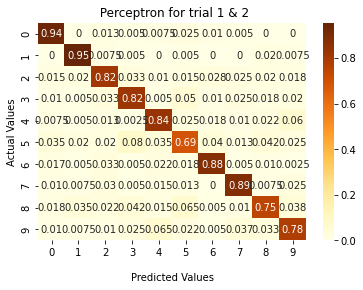

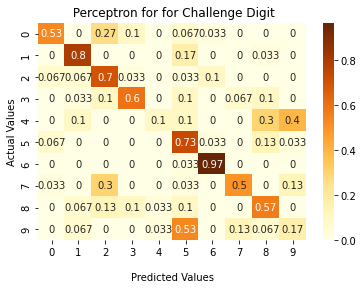

In [ ]:
Perceptron_1_confusion_matrix = confusion_matrix(test_y_1, pcn_1_predict, normalize="true")
Perceptron_2_confusion_matrix = confusion_matrix(test_y_2, pcn_2_predict, normalize="true")
confusion_matrix_heatmap((Perceptron_1_confusion_matrix + Perceptron_2_confusion_matrix)/2, " Perceptron for trial 1 & 2")

Perceptron_1_confusion_matrix = confusion_matrix(bonus_test_y, pcn_bonus_1_predict, normalize="true")
Perceptron_2_confusion_matrix = confusion_matrix(bonus_test_y, pcn_bonus_2_predict, normalize="true")
confusion_matrix_heatmap((Perceptron_1_confusion_matrix + Perceptron_2_confusion_matrix)/2, " Perceptron for for Challenge Digit")

# Decision Tree

## Tune For best hyperparameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
criterion = ['entropy','gini']
max_depth = [None, 5, 10, 20, 30, 50, 80, 100, 150]
min_samples_split = [2, 5, 10, 15, 20]
random_grid = {
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'criterion': criterion,
               }
dtc = DecisionTreeClassifier()
dtc_random = RandomizedSearchCV(estimator = dtc, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=0, random_state=42, n_jobs = -1)
dtc_random.fit(x, y)
dtc_random.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


{'criterion': 'entropy', 'max_depth': 150, 'min_samples_split': 2}

## Training Decision Tree

DecisionTreeClassifier Classifiers Trial 1 & 2 Mean Accuracy:  0.72025
x data set is train_x_1_pca [ 0 ], DecisionTreeClassifier Classifiers Trial 1 & 2 PCA=90% Mean Accuracy:  0.7
x data set is train_x_1_pca [ 1 ], DecisionTreeClassifier Classifiers Trial 1 & 2 PCA=80% Mean Accuracy:  0.716
x data set is train_x_1_pca [ 2 ], DecisionTreeClassifier Classifiers Trial 1 & 2 PCA=70% Mean Accuracy:  0.7252500000000001
x data set is train_x_1_pca [ 3 ], DecisionTreeClassifier Classifiers Trial 1 & 2 PCA=60% Mean Accuracy:  0.7262500000000001
x data set is train_x_1_pca [ 4 ], DecisionTreeClassifier Classifiers Trial 1 & 2 PCA=50% Mean Accuracy:  0.7215
x data set is train_x_1_pca [ 5 ], DecisionTreeClassifier Classifiers Trial 1 & 2 PCA=40% Mean Accuracy:  0.70125
x data set is train_x_1_pca [ 6 ], DecisionTreeClassifier Classifiers Trial 1 & 2 PCA=30% Mean Accuracy:  0.6152499999999999
x data set is train_x_1_pca [ 7 ], DecisionTreeClassifier Classifiers Trial 1 & 2 PCA=20% Mean Accuracy: 

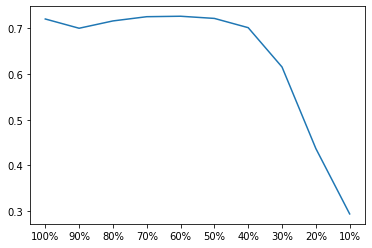

In [ ]:
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion="entropy",
                                                              max_depth=150, 
                                                              min_samples_split=2))
DecisionTreeClassifier_1_score = np.mean(cross_val_score(pipe,train_x_1,train_y_1,cv=10))
DecisionTreeClassifier_2_score = np.mean(cross_val_score(pipe,train_x_2,train_y_2,cv=10))
DecisionTreeClassifier_mean_accuracy_list = [(DecisionTreeClassifier_1_score + DecisionTreeClassifier_2_score)/2]
print("DecisionTreeClassifier Classifiers Trial 1 & 2 Mean Accuracy: ", DecisionTreeClassifier_mean_accuracy_list[0])
for count in range(9):
  title = "PCA=" + str(90-(count*10)) + "%"
  DecisionTreeClassifier_1_pca_score = np.mean(cross_val_score(pipe,train_x_1_pca[count],train_y_1,cv=10))
  DecisionTreeClassifier_2_pca_score = np.mean(cross_val_score(pipe,train_x_2_pca[count],train_y_2,cv=10))
  DecisionTreeClassifier_mean_accuracy_list.append((DecisionTreeClassifier_1_pca_score + DecisionTreeClassifier_2_pca_score)/2)
  print("x data set is train_x_1_pca [",count,"], DecisionTreeClassifier Classifiers Trial 1 & 2 "+ title +" Mean Accuracy: ", DecisionTreeClassifier_mean_accuracy_list[count  +1])
plt.plot(pca_list,DecisionTreeClassifier_mean_accuracy_list)
plt.show()

## Results

In [ ]:
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion="entropy",max_depth=10, min_samples_split=7))

dct_1 = pipe.fit(train_x_1_pca[3], train_y_1)
dct_1_training_score=dct_1.score(train_x_1_pca[3], train_y_1)
dct_1_predict = dct_1.predict(test_x_1_pca[3])
dct_bonus_1_predict = dct_1.predict(bonus_x_1_pca[3])

dct_1_score = dct_1.score(test_x_1_pca[3], test_y_1)
dct_bonus_1_score = dct_1.score(bonus_x_1_pca[3], bonus_test_y)


dct_2 = pipe.fit(train_x_2_pca[3], train_y_2)
dct_2_training_score=dct_2.score(train_x_2_pca[3], train_y_2)
dct_2_predict = dct_2.predict(test_x_2_pca[3])
dct_bonus_2_predict = dct_2.predict(bonus_x_2_pca[3])

dct_2_score = dct_2.score(test_x_2_pca[3], test_y_2)
dct_bonus_2_score = dct_2.score(bonus_x_2_pca[3], bonus_test_y)

dct_Training_mean_accuracy = (dct_1_training_score+dct_2_training_score)/2
dct_mean_accuracy = (dct_1_score + dct_2_score)/2
dct_bonus_mean_accuracy = (dct_bonus_1_score + dct_bonus_2_score)/2


dct_1_confusion_matrix = confusion_matrix(test_y_1, dct_1_predict, normalize="true")
dct_bonus_confusion_matrix = confusion_matrix(bonus_test_y, dct_bonus_1_predict, normalize="true")
dct_2_confusion_matrix = confusion_matrix(test_y_2, dct_2_predict, normalize="true")
dct_bonus_confusion_matrix = confusion_matrix(bonus_test_y, dct_bonus_2_predict, normalize="true")


result = np.array([["Training set",round(DecisionTreeClassifier_mean_accuracy_list[4],5)],
                    ["Test Set",round(dct_mean_accuracy,5)],
                   ["Challenge",round(dct_bonus_mean_accuracy,5)]])
report = pd.DataFrame(result,columns=["Decision Tree Classifiers","Mean Accuracy"])
report

,Decision Tree Classifiers,Mean Accuracy
0,Training set,0.72625
1,Test Set,0.73525
2,Challenge,0.52


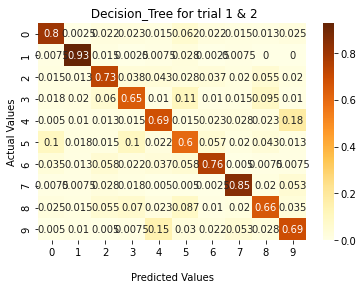

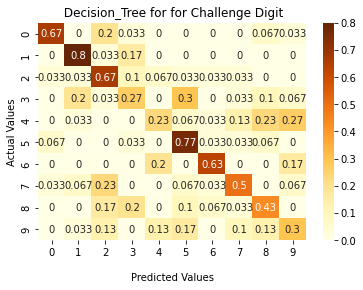

In [ ]:
Decision_Tree_1_confusion_matrix = confusion_matrix(test_y_1, dct_1_predict, normalize="true")
Decision_Tree_2_confusion_matrix = confusion_matrix(test_y_2, dct_2_predict, normalize="true")
confusion_matrix_heatmap((Decision_Tree_1_confusion_matrix + Decision_Tree_2_confusion_matrix)/2, " Decision_Tree for trial 1 & 2")

Decision_Tree_1_confusion_matrix = confusion_matrix(bonus_test_y, dct_bonus_1_predict, normalize="true")
Decision_Tree_2_confusion_matrix = confusion_matrix(bonus_test_y, dct_bonus_2_predict, normalize="true")
confusion_matrix_heatmap((Decision_Tree_1_confusion_matrix + Decision_Tree_2_confusion_matrix)/2, " Decision_Tree for for Challenge Digit")

# Randon Forest

## Tune For best hyperparameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [100,200,500,1000]
max_features = ['auto', 'sqrt','log2']
max_depth = [None, 5, 10, 20, 30, 50]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=0, random_state=42, n_jobs = -1)
rf_random.fit(x, y)
rf_random.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1000}

## Training Random Foreset

RandomForestClassifier Classifiers Trial 1 & 2 Mean Accuracy:  0.9309999999999999
x data set is train_x_1_pca [ 0 ],RandomForestClassifier Classifiers Trial 1 & 2 PCA=90% Mean Accuracy:  0.9205
x data set is train_x_1_pca [ 1 ],RandomForestClassifier Classifiers Trial 1 & 2 PCA=80% Mean Accuracy:  0.92025
x data set is train_x_1_pca [ 2 ],RandomForestClassifier Classifiers Trial 1 & 2 PCA=70% Mean Accuracy:  0.91425
x data set is train_x_1_pca [ 3 ],RandomForestClassifier Classifiers Trial 1 & 2 PCA=60% Mean Accuracy:  0.8939999999999999
x data set is train_x_1_pca [ 4 ],RandomForestClassifier Classifiers Trial 1 & 2 PCA=50% Mean Accuracy:  0.8647499999999999
x data set is train_x_1_pca [ 5 ],RandomForestClassifier Classifiers Trial 1 & 2 PCA=40% Mean Accuracy:  0.821
x data set is train_x_1_pca [ 6 ],RandomForestClassifier Classifiers Trial 1 & 2 PCA=30% Mean Accuracy:  0.7102499999999999
x data set is train_x_1_pca [ 7 ],RandomForestClassifier Classifiers Trial 1 & 2 PCA=20% Mean Acc

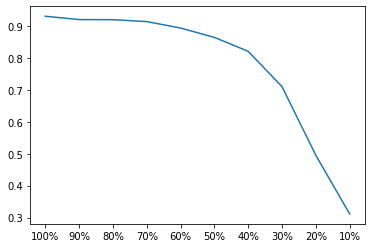

In [ ]:
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(bootstrap=False,
                                                              max_depth=50, 
                                                              max_features='log2', 
                                                              min_samples_leaf=2,
                                                              min_samples_split=2,
                                                              n_estimators=1000))
RandomForestClassifier_1_score = np.mean(cross_val_score(pipe,train_x_1,train_y_1,cv=10))
RandomForestClassifier_2_score = np.mean(cross_val_score(pipe,train_x_2,train_y_2,cv=10))
RandomForestClassifier_mean_accuracy_list = [(RandomForestClassifier_1_score + RandomForestClassifier_2_score)/2]
print("RandomForestClassifier Classifiers Trial 1 & 2 Mean Accuracy: ", RandomForestClassifier_mean_accuracy_list[0])
for count in range(9):
  title = "PCA=" + str(90-(count*10)) + "%"
  RandomForestClassifier_1_pca_score = np.mean(cross_val_score(pipe,train_x_1_pca[count],train_y_1,cv=10))
  RandomForestClassifier_2_pca_score = np.mean(cross_val_score(pipe,train_x_2_pca[count],train_y_2,cv=10))
  RandomForestClassifier_mean_accuracy_list.append((RandomForestClassifier_1_pca_score + RandomForestClassifier_2_pca_score)/2)
  print("x data set is train_x_1_pca [", count, "],RandomForestClassifier Classifiers Trial 1 & 2 "+ title +" Mean Accuracy: ", RandomForestClassifier_mean_accuracy_list[count+1])
plt.plot(pca_list,RandomForestClassifier_mean_accuracy_list)
plt.show()

## Results

In [ ]:
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(bootstrap=False,
                                                              max_depth=50, 
                                                              max_features='log2', 
                                                              min_samples_leaf=2,
                                                              min_samples_split=2,
                                                              n_estimators=1000))
rdf_1 = pipe.fit(train_x_1, train_y_1)
rdf_1_predict = rdf_1.predict(test_x_1)
rdf_1_score = rdf_1.score(test_x_1, test_y_1)
rdf_1_confusion_matrix = confusion_matrix(test_y_1, rdf_1_predict, normalize="true")

rdf_2 = pipe.fit(train_x_2, train_y_2)
rdf_2_predict = rdf_2.predict(test_x_2)
rdf_2_score = rdf_2.score(test_x_2, test_y_2)
rdf_2_confusion_matrix = confusion_matrix(test_y_2, rdf_2_predict, normalize="true")
rdf_mean_accuracy = (rdf_1_score + rdf_2_score)/2


rdf_bonus_1_predict = rdf_1.predict(bonus_test_x)
rdf_bonus_1_score = rdf_1.score(bonus_test_x, bonus_test_y)
rdf_bonus_confusion_matrix = confusion_matrix(bonus_test_y, rdf_bonus_1_predict, normalize="true")

rdf_bonus_2_predict = rdf_2.predict(bonus_test_x)
rdf_bonus_2_score = rdf_2.score(bonus_test_x, bonus_test_y)
rdf_bonus_confusion_matrix = confusion_matrix(bonus_test_y, rdf_bonus_2_predict, normalize="true")



rdf_bonus_mean_accuracy = (rdf_bonus_1_score + rdf_bonus_2_score)/2
result = np.array([["Training set",round(RandomForestClassifier_mean_accuracy_list[0],3)],
                      ["Test Set",round(rdf_mean_accuracy,3)],["Challenge",round(rdf_bonus_mean_accuracy,3)]])
report = pd.DataFrame(result,columns=["Randon Forest Classifiers","Mean Accuracy"])
report

,Randon Forest Classifiers,Mean Accuracy
0,Training set,0.931
1,Test Set,0.933
2,Challenge,0.74


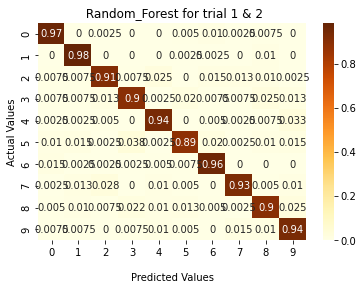

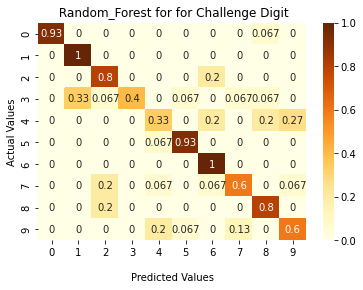

In [ ]:
Random_Forest_1_confusion_matrix = confusion_matrix(test_y_1, rdf_1_predict, normalize="true")
Random_Forest_2_confusion_matrix = confusion_matrix(test_y_2, rdf_2_predict, normalize="true")
confusion_matrix_heatmap((Random_Forest_1_confusion_matrix + Random_Forest_2_confusion_matrix)/2, " Random_Forest for trial 1 & 2")

Random_Forest_1_confusion_matrix = confusion_matrix(bonus_test_y, rdf_bonus_1_predict, normalize="true")
Random_Forest_2_confusion_matrix = confusion_matrix(bonus_test_y, rdf_bonus_2_predict, normalize="true")
confusion_matrix_heatmap((Random_Forest_1_confusion_matrix + Random_Forest_2_confusion_matrix)/2, " Random_Forest for for Challenge Digit")